<p>Our Dataset is composed of mental health and frequency of mental health disorders in the tech workplace.</p>
<h2>Question to responde:</h2>
<h3>Taking treatment for a mental health condition?</h3>
<p>1. What are the most influencing features?</p>
<p>2. In this dataset is able to response if a person is talking a treatment or not?</p>
<h4>The Dataset:</h4>
<p>Size: 1259 rows e 27 features</p>
<ul>
    <li>Yes:50.595711</li>
    <li>No:49.404289</li>
</ul>
<p> The model is going to be train and an API in going to be available to test new cases.</p>
    


## Data set Mental Health in TI

<p>"This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace."(From Kanggle)</p>
<p> link: <a href="https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey?resource=download&select=survey.csv">Data source Kanggle</a></p>
<p>Version 2.0 - 12/10/2022</p>

In [1]:
## imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 1 Data Collection

In [2]:
# Lendo arquivo
df = pd.read_csv("data/survey.csv")

## 2 Data Understanding

In [3]:
df.shape

(1259, 27)

In [4]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [5]:
#Tipos das colunas
df.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [6]:
#Soma nulos por Coluna
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [7]:
# Soma todos os NaN do dataset
df.isna().sum().sum()

1892

## 3 Data Preparation

### Dealing with missing values
<p>Missing values in columns</p>
<ul>
<li>state - 515</li>
<li>self_employed - 18</li>
<li>work_interfere - 264</li>
<li>comments - 1095</li>
</ul>



#### Dropping Columns

In [8]:
# Drop column: comments
df.drop(["comments"], axis=1, inplace=True)
# Drop TimeStamp
df.drop(["Timestamp"], axis=1, inplace=True)

In [9]:
df.columns

Index(['Age', 'Gender', 'Country', 'state', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [10]:
# Sum of null values
df.isnull().sum()

Age                            0
Gender                         0
Country                        0
state                        515
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

#### Replacing with null values
<ul>
<li>self_employed - 18</li>
<li>work_interfere - 264</li>
<li>state - 515</li>
</ul>

In [11]:
df['self_employed'].value_counts(dropna=False)

No     1095
Yes     146
NaN      18
Name: self_employed, dtype: int64

In [12]:
df['work_interfere'].value_counts(dropna=False)

Sometimes    465
NaN          264
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

In [13]:
df['state'].value_counts(dropna=False)

NaN    515
CA     138
WA      70
NY      57
TN      45
TX      44
OH      30
IL      29
OR      29
PA      29
IN      27
MI      22
MN      21
MA      20
FL      15
NC      14
VA      14
WI      12
GA      12
MO      12
UT      11
CO       9
MD       8
AL       8
AZ       7
OK       6
NJ       6
KY       5
SC       5
IA       4
CT       4
DC       4
NV       3
VT       3
SD       3
KS       3
NH       3
WY       2
NM       2
NE       2
WV       1
ID       1
MS       1
RI       1
LA       1
ME       1
Name: state, dtype: int64

#### Interpole data to self_employed and work_interfere

In [14]:
df['self_employed'].fillna('Not Informed', inplace=True)
df['work_interfere'].fillna('Not Informed', inplace=True)
df['state'].fillna('Not Informed', inplace=True)

In [15]:
df['self_employed'].value_counts(dropna=False)

No              1095
Yes              146
Not Informed      18
Name: self_employed, dtype: int64

In [16]:
df['work_interfere'].value_counts(dropna=False)

Sometimes       465
Not Informed    264
Never           213
Rarely          173
Often           144
Name: work_interfere, dtype: int64

In [17]:
df['state'].value_counts(dropna=False)

Not Informed    515
CA              138
WA               70
NY               57
TN               45
TX               44
OH               30
IL               29
OR               29
PA               29
IN               27
MI               22
MN               21
MA               20
FL               15
NC               14
VA               14
WI               12
GA               12
MO               12
UT               11
CO                9
MD                8
AL                8
AZ                7
OK                6
NJ                6
KY                5
SC                5
IA                4
CT                4
DC                4
NV                3
VT                3
SD                3
KS                3
NH                3
WY                2
NM                2
NE                2
WV                1
ID                1
MS                1
RI                1
LA                1
ME                1
Name: state, dtype: int64

In [18]:
df.isnull().sum()

Age                          0
Gender                       0
Country                      0
state                        0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

## 4 Exploração Analítica (EDA)

In [19]:
categorical_features = df.columns[df.dtypes == object]
numerical_features = df.columns[df.dtypes != object]

In [20]:
categorical_features

Index(['Gender', 'Country', 'state', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [21]:
numerical_features

Index(['Age'], dtype='object')

In [22]:
# Quantity of categorical features - 24
len(categorical_features)

24

In [23]:
# Unique fields in each feature

In [24]:
def unique_features(features):
    dict_features ={}
    for feature in features:
        dict_features[feature] = features[feature].value_counts()
    return dict_features

In [25]:
unique_f = unique_features(df)

In [26]:
unique_f

{'Age':  29             85
  32             82
  26             75
  27             71
  33             70
  28             68
  31             67
  34             65
  30             63
  25             61
  35             55
  23             51
  24             46
  37             43
  38             39
  36             37
  40             33
  39             33
  43             28
  22             21
  41             21
  42             20
  21             16
  45             12
  46             12
  44             11
  19              9
  18              7
  48              6
  50              6
  20              6
  51              5
  49              4
  56              4
  57              3
  54              3
  55              3
  47              2
  60              2
  99999999999     1
  5               1
 -1               1
  11              1
  8               1
  61              1
  53              1
 -29              1
 -1726            1
  65              1
  62         

## 5 Features Engineering

#### 1 - Numerical Values

In [27]:
## min: -1726 and MAX: 99999999999
## get the Median and substitute
df['Age'].median()

31.0

In [28]:
# Ages > 100  => 329,99999999999
df[df['Age']>100]

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
364,329,Male,United States,OH,No,No,Yes,Often,6-25,Yes,...,Don't know,Don't know,Maybe,No,Some of them,No,No,No,No,No
390,99999999999,All,Zimbabwe,Not Informed,Yes,Yes,Yes,Often,1-5,No,...,No,Very difficult,Yes,Yes,No,No,Yes,No,No,Yes


In [29]:
# Ages < 15 => -29, -1726, 5, 8, 11, -1
df[df['Age']<15]

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
143,-29,Male,United States,MN,No,No,No,Not Informed,More than 1000,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,No,No,Don't know,No
715,-1726,male,United Kingdom,Not Informed,No,No,Yes,Sometimes,26-100,No,...,Don't know,Somewhat difficult,Yes,No,No,No,No,Maybe,Don't know,No
734,5,Male,United States,OH,No,No,No,Not Informed,100-500,No,...,Don't know,Somewhat easy,No,No,Yes,Yes,No,No,Yes,No
989,8,A little about you,"Bahamas, The",IL,Yes,Yes,Yes,Often,1-5,Yes,...,Yes,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1090,11,male,United States,OH,Yes,No,No,Never,1-5,Yes,...,Yes,Very easy,No,No,Some of them,Some of them,No,Maybe,Yes,No
1127,-1,p,United States,AL,Yes,Yes,Yes,Often,1-5,Yes,...,Yes,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [30]:
# If Age > 100 or Age < 15  = Median 
df.loc[df.Age > 100, 'Age'] = df['Age'].median()
df.loc[df.Age < 15, 'Age'] = df['Age'].median()

#### 2 - Categorical Values

#### 2.1 - Gender

In [31]:
# Check quantity of categories
df['Gender'].value_counts( normalize=True ) * 100

Male                                              48.848292
male                                              16.362192
Female                                             9.610802
M                                                  9.213662
female                                             4.924543
F                                                  3.018268
m                                                  2.700556
f                                                  1.191422
Make                                               0.317712
Male                                               0.238284
Woman                                              0.238284
Cis Male                                           0.158856
Man                                                0.158856
Female (trans)                                     0.158856
Female                                             0.158856
Trans woman                                        0.079428
msle                                    

In [32]:
df['Gender'].describe()

count     1259
unique      49
top       Male
freq       615
Name: Gender, dtype: object

In [33]:
df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [34]:
df['Gender'].describe()

count     1259
unique      49
top       Male
freq       615
Name: Gender, dtype: object

#### 2.2 Change Categorical values for Numeric

In [35]:
categorical_features

Index(['Gender', 'Country', 'state', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [36]:
df['obs_consequence'].unique()

array(['No', 'Yes'], dtype=object)

In [37]:
df['Gender'] = df['Gender'].map({'Female':0, 'M':1, 'Male':1, 'male':1, 'female':0, 'm':1, 'Male-ish':2, 'maile':1,\
                                 'Trans-female':2, 'Cis Female':2, 'F':0, 'something kinda male?':2,\
                                 'Cis Male':2, 'Woman':0, 'f':0, 'Mal':1, 'Male (CIS)':2, 'queer/she/they':2,\
                                 'non-binary':2, 'Femake':0, 'woman':0, 'Make':1, 'Nah':2, 'All':2, 'Enby':2,\
                                 'fluid':2, 'Genderqueer':2, 'Female ':0, 'Androgyne':2, 'Agender':2,\
                                 'cis-female/femme':2, 'Guy (-ish) ^_^':2, 'male leaning androgynous':2,\
                                 'Male ':1, 'Man':1, 'Trans woman':2, 'msle':1, 'Neuter':2, 'Female (trans)':2,\
                                 'queer':2, 'Female (cis)':2, 'Mail':1, 'cis male':2, 'A little about you':2,\
                                 'Malr':1, 'p':2, 'femail':0, 'Cis Man':2,\
                                 'ostensibly male, unsure what that really means':2
                                })
df['Country_num'] = pd.factorize(df['Country'])[0]
df['state_num'] = pd.factorize(df['state'])[0]
df['self_employed'] = df['self_employed'].map({'Yes':1, 'No':0,'Not Informed':2})
df['family_history'] = df['family_history'].map({'Yes':1,'No':0})
df['treatment'] = df['treatment'].map({'Yes':1,'No':0})
df['work_interfere'] =df['work_interfere'].map({'Often':0, 'Rarely':1, 'Never':2, 'Sometimes':3, 'Not Informed':4})
df['no_employees'] = df['no_employees'].map({'1-5':0,'6-25':1,'26-100':2,'100-500':3,'500-1000':4,'More than 1000':5})
df['remote_work'] = df['remote_work'].map({'Yes':1,'No':0})
df['tech_company'] = df['tech_company'].map({'Yes':1,'No':0})
df['benefits'] = df['benefits'].map({'Yes':1, "Don't know":2, 'No':0})
df['care_options'] = df['care_options'].map({'Yes':1, 'Not sure':2, 'No':0})
df['wellness_program'] = df['wellness_program'].map({'Yes':1, "Don't know":2, 'No':0})
df['seek_help'] = df['seek_help'].map({'Yes':1, "Don't know":2, 'No':0})
df['anonymity'] = df['anonymity'].map({'Yes':1, "Don't know":2, 'No':0})
df['leave'] = df['leave'].map({'Somewhat easy':0, "Don't know":1, 'Somewhat difficult':2,'Very difficult':3, 'Very easy':4})
df['mental_health_consequence'] = df['mental_health_consequence'].map({'Yes':1, 'Maybe':2, 'No':0})
df['phys_health_consequence'] = df['phys_health_consequence'].map({'Yes':1, 'Maybe':2, 'No':0})
df['coworkers'] = df['coworkers'].map({'Yes':1, 'Some of them':2, 'No':0})
df['supervisor'] = df['supervisor'].map({'Yes':1, 'Some of them':2, 'No':0})
df['mental_health_interview'] = df['mental_health_interview'].map({'Yes':1, 'Maybe':2, 'No':0})
df['phys_health_interview'] = df['phys_health_interview'].map({'Yes':1, 'Maybe':2, 'No':0})
df['mental_vs_physical'] = df['mental_vs_physical'].map({'Yes':1, "Don't know":2, 'No':0})
df['obs_consequence'] = df['obs_consequence'].map({'Yes':1,'No':0})

In [38]:
categorical_features_test = df.columns[df.dtypes == object]
numerical_features_test = df.columns[df.dtypes != object]

In [39]:
categorical_features_test

Index(['Country', 'state'], dtype='object')

### Target: treatment

In [40]:
df['treatment'].value_counts( normalize=True ) * 100

1    50.595711
0    49.404289
Name: treatment, dtype: float64

In [41]:
df['treatment'].describe()

count    1259.000000
mean        0.505957
std         0.500163
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: treatment, dtype: float64

In [42]:
type(df['treatment'])

pandas.core.series.Series

In [43]:
df['treatment'].astype('int')

0       1
1       0
2       0
3       1
4       0
       ..
1254    1
1255    1
1256    1
1257    0
1258    1
Name: treatment, Length: 1259, dtype: int32

In [44]:
df.dtypes

Age                           int64
Gender                        int64
Country                      object
state                        object
self_employed                 int64
family_history                int64
treatment                     int64
work_interfere                int64
no_employees                  int64
remote_work                   int64
tech_company                  int64
benefits                      int64
care_options                  int64
wellness_program              int64
seek_help                     int64
anonymity                     int64
leave                         int64
mental_health_consequence     int64
phys_health_consequence       int64
coworkers                     int64
supervisor                    int64
mental_health_interview       int64
phys_health_interview         int64
mental_vs_physical            int64
obs_consequence               int64
Country_num                   int64
state_num                     int64
dtype: object

In [45]:
df.describe(include="all")

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Country_num,state_num
count,1259.000000,1259.000000,1259,1259,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,...,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000
unique,NaN,NaN,48,46,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,United States,Not Informed,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,751,515,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,32.069897,0.830024,NaN,NaN,0.144559,0.390786,0.505957,2.422558,2.419380,0.298650,...,0.989674,0.482129,1.408261,0.965846,0.363781,1.045274,1.187450,0.146148,3.427323,8.181890
std,7.265565,0.434616,NaN,NaN,0.390355,0.488121,0.500163,1.275051,1.708151,0.457848,...,0.876683,0.826983,0.809401,0.767758,0.748814,0.915517,0.832451,0.353395,7.504747,8.881455
min,18.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,31.000000,1.000000,NaN,NaN,0.000000,0.000000,1.000000,3.000000,2.000000,0.000000,...,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,4.000000
75%,36.000000,1.000000,NaN,NaN,0.000000,1.000000,1.000000,3.000000,4.000000,1.000000,...,2.000000,1.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,12.000000


In [46]:
unique_f = unique_features(df)
unique_f

{'Age': 29    85
 32    82
 26    75
 31    75
 27    71
 33    70
 28    68
 34    65
 30    63
 25    61
 35    55
 23    51
 24    46
 37    43
 38    39
 36    37
 39    33
 40    33
 43    28
 41    21
 22    21
 42    20
 21    16
 45    12
 46    12
 44    11
 19     9
 18     7
 48     6
 50     6
 20     6
 51     5
 49     4
 56     4
 55     3
 57     3
 54     3
 47     2
 60     2
 58     1
 62     1
 65     1
 53     1
 61     1
 72     1
 Name: Age, dtype: int64,
 'Gender': 1    985
 0    244
 2     30
 Name: Gender, dtype: int64,
 'Country': United States             751
 United Kingdom            185
 Canada                     72
 Germany                    45
 Ireland                    27
 Netherlands                27
 Australia                  21
 France                     13
 India                      10
 New Zealand                 8
 Poland                      7
 Switzerland                 7
 Sweden                      7
 Italy                       7
 So

In [47]:
df['phys_health_interview'].unique()

array([2, 0, 1], dtype=int64)

In [48]:
numerical_columns = df.columns[df.dtypes != object ]

In [49]:
numerical_columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'Country_num', 'state_num'],
      dtype='object')

In [50]:
features = df[['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'Country_num', 'state_num',
       'work_interfere', 'no_employees', 'leave']]

In [51]:
df_features = features

#### Z-score with StandardScaler

In [52]:
'''from sklearn.preprocessing import StandardScaler

# create a scaler object
std_scaler = StandardScaler()
std_scaler
# fit and transform the data
features_standard = pd.DataFrame(std_scaler.fit_transform(df_features), columns=df_features.columns)
'''

'from sklearn.preprocessing import StandardScaler\n\n# create a scaler object\nstd_scaler = StandardScaler()\nstd_scaler\n# fit and transform the data\nfeatures_standard = pd.DataFrame(std_scaler.fit_transform(df_features), columns=df_features.columns)\n'

#### Feature Visualization

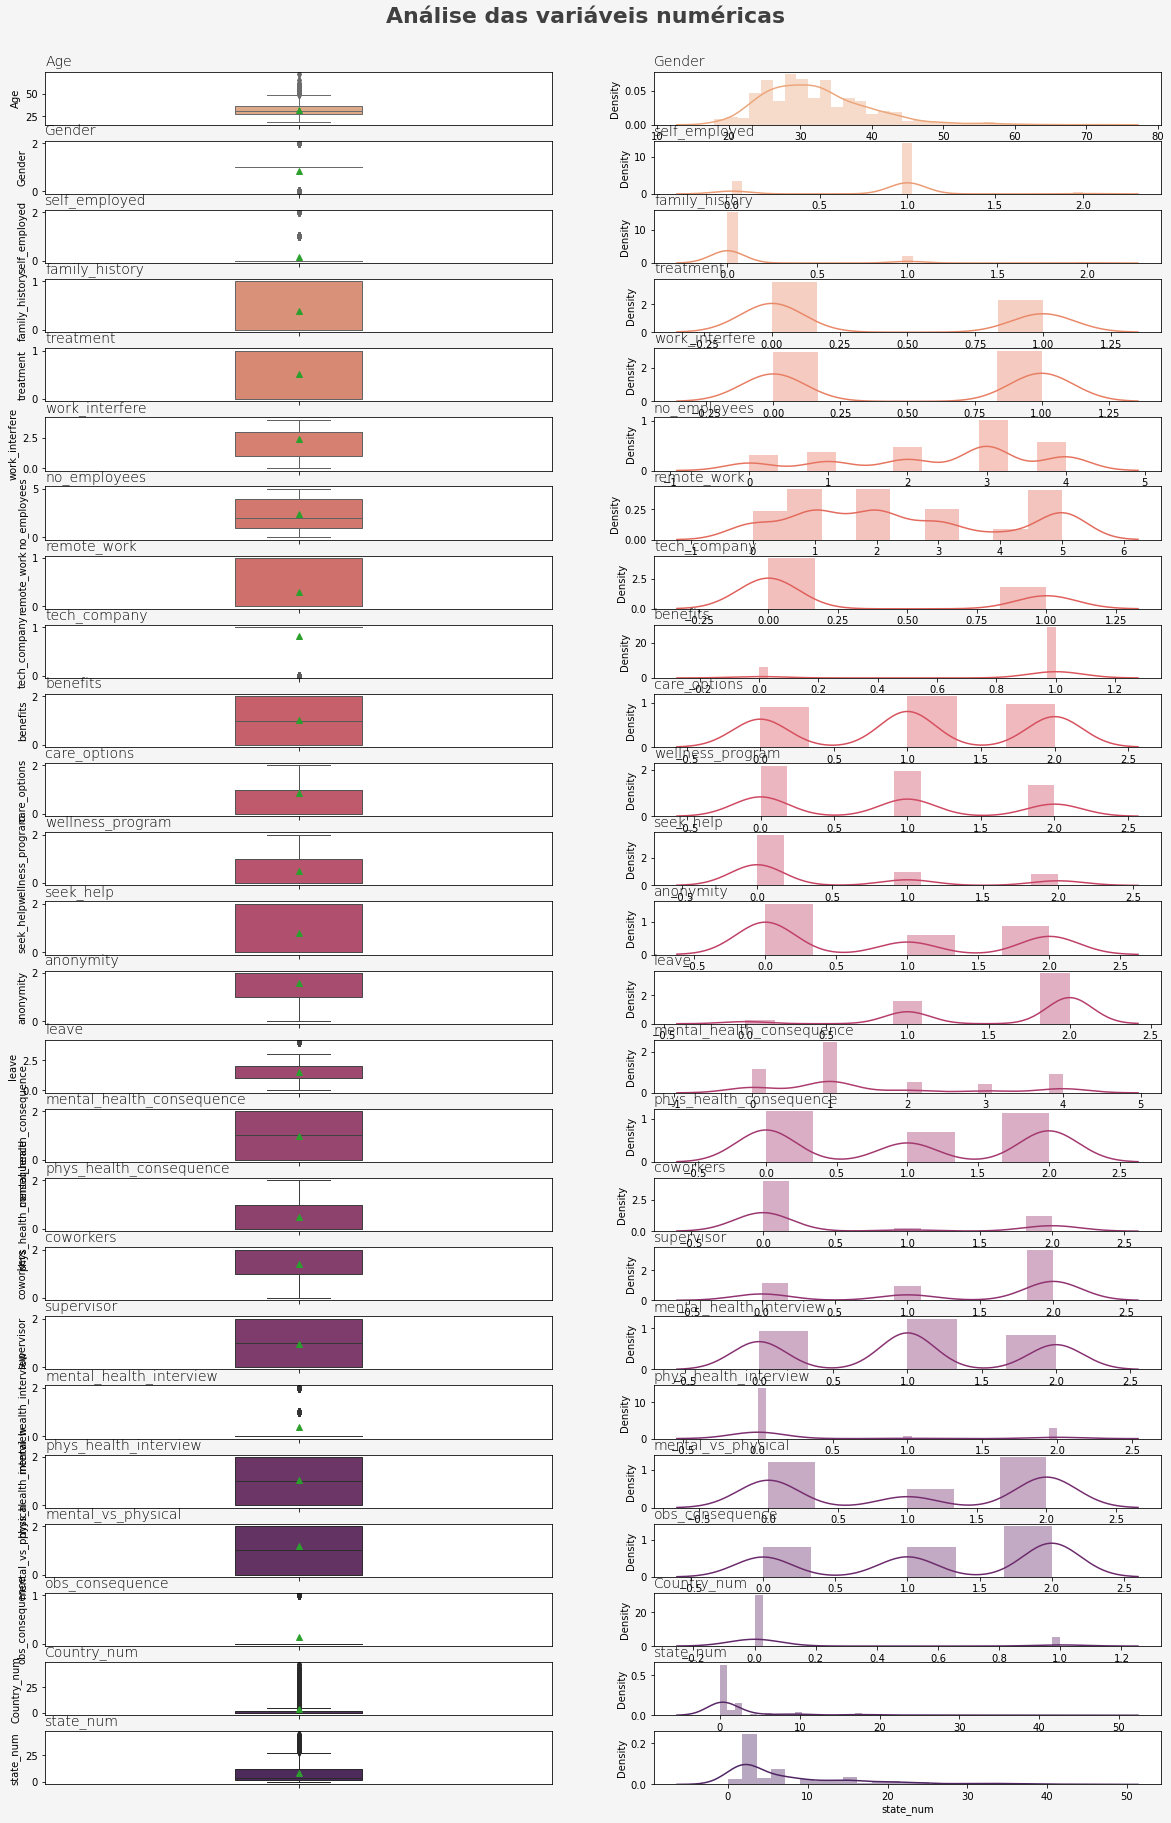

In [53]:
# Grid Gráficos

# Tamanho
Figura, Eixo = plt.subplots( figsize=(20, 30) )

# Cor de fundo
Cor_fundo = '#f5f5f5'
Figura.set_facecolor( Cor_fundo )

# Paleta de cores
paleta_cores = sns.color_palette('flare', len(numerical_columns) * 2)

# Título
plt.suptitle('Análise das variáveis numéricas', fontsize=22, color='#404040', fontweight=600)

# Estrutura 
linhas =  26 # (Todas as infos. numéricas)
colunas = 2 # (Boxplot - Distplot)
posicao = 1 # Posição inicial do Grid

#Loop para Plotar os dados
for coluna in numerical_columns:
    
    #Plot no Grid -- Boxplot
    # Título
    plt.title( f'{coluna}', loc='left', fontsize=14, fontweight=200)
    
    plt.subplot( linhas, colunas, posicao )
    
    #Boxplot
    sns.boxplot( data=features, y=coluna, showmeans=True, saturation=0.75, linewidth=1,\
                color=paleta_cores[posicao], width=0.25 )
    posicao += 1
        
    # Título
    plt.title( f'{coluna}', loc='left', fontsize=14, fontweight=200)

    # Plot no Grid -- Distplot
    plt.subplot( linhas, colunas, posicao )
    
    # Distplot
    sns.distplot( features[coluna], color=paleta_cores[posicao-1] )

    posicao += 1
    
# Ajuste de Grid
plt.subplots_adjust( top=0.95, hspace=0.3 )

In [54]:
## Drop Country_num and state
features.drop(["Country_num"], axis=1, inplace=True)
features.drop(["state_num"], axis=1, inplace=True)

In [55]:
features.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'work_interfere',
       'no_employees', 'leave'],
      dtype='object')

In [56]:
Y = features['treatment']
x = features.drop(['treatment'], axis=1)

In [57]:
x.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'work_interfere',
       'no_employees', 'leave'],
      dtype='object')

#### Correlação dos dados

In [58]:
features.corr()

,Age,Gender,self_employed,family_history,treatment,remote_work,tech_company,benefits,care_options,wellness_program,...,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,work_interfere,no_employees,leave
Age,1.000000,0.063175,0.069027,0.009103,0.073165,0.145461,-0.057668,-0.046428,0.012181,0.034519,...,0.094140,-0.014859,-0.009119,-0.059614,-0.029038,-0.013077,0.070011,-0.036226,0.117283,-0.000009
Gender,0.063175,1.000000,0.041868,-0.117551,-0.134297,0.015624,0.062883,-0.046936,-0.059618,-0.057196,...,-0.037210,-0.005948,-0.003118,0.107103,0.101265,-0.028311,-0.014100,0.020695,-0.079506,0.066019
self_employed,0.069027,0.041868,1.000000,0.007830,0.015943,0.265288,0.079074,-0.165179,0.005232,-0.009507,...,-0.014153,0.006784,-0.002079,0.100055,0.041728,-0.034531,0.059935,-0.076510,-0.346116,0.094700
family_history,0.009103,-0.117551,0.007830,1.000000,0.377918,0.014456,-0.046079,0.003541,0.010452,-0.018524,...,0.038976,-0.013811,-0.000416,-0.065201,-0.062747,-0.094343,0.124861,-0.144196,0.025422,0.011632
treatment,0.073165,-0.134297,0.015943,0.377918,1.000000,0.026937,-0.031525,-0.095206,0.021324,-0.017388,...,0.040135,0.021477,-0.010855,-0.088566,-0.036177,-0.117235,0.156972,-0.338003,0.009169,0.062590
remote_work,0.145461,0.015624,0.265288,0.014456,0.026937,1.000000,0.131108,-0.037797,-0.020088,0.012462,...,0.022505,0.018220,-0.025233,0.074701,0.037884,0.036538,-0.039065,-0.037966,-0.239556,0.095119
tech_company,-0.057668,0.062883,0.079074,-0.046079,-0.031525,0.131108,1.000000,-0.041486,0.000352,-0.031858,...,-0.070048,0.018057,0.016697,0.079750,0.027772,0.076191,-0.062347,0.032920,-0.254130,0.033830
benefits,-0.046428,-0.046936,-0.165179,0.003541,-0.095206,-0.037797,-0.041486,1.000000,0.229613,0.240593,...,-0.096849,0.071192,-0.016870,0.019712,0.001610,0.177691,-0.111243,0.081203,0.245532,-0.093878
care_options,0.012181,-0.059618,0.005232,0.010452,0.021324,-0.020088,0.000352,0.229613,1.000000,0.261628,...,-0.002238,0.033948,0.093730,0.004062,-0.030221,0.038692,-0.018967,-0.010231,0.145555,0.013526
wellness_program,0.034519,-0.057196,-0.009507,-0.018524,-0.017388,0.012462,-0.031858,0.240593,0.261628,1.000000,...,-0.045012,0.058339,0.101564,0.065797,-0.061410,0.100025,-0.034676,0.035645,0.276597,-0.008681


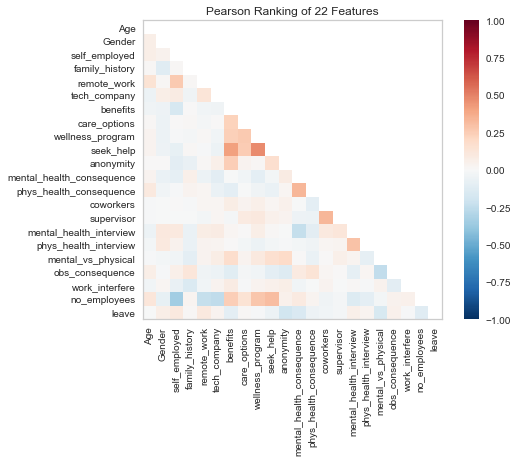

In [59]:
# Yellowbrick
from yellowbrick.features import Rank2D

# Definir o modelo
correlacao = Rank2D( algoritmo='pearson' )

# Filtrar função
correlacao.fit( x, Y )
correlacao.transform( x )
correlacao.show();


In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train, x_test, Y_train, Y_test = train_test_split(x,Y, test_size=0.2, random_state=8)

In [62]:
print(f'Train data:{x_train.shape[0]} {Y_train.shape[0]}')
print(f'Test data:{x_test.shape[0]} {Y_test.shape[0]}')

Train data:1007 1007
Test data:252 252


In [63]:
# Feature more relevant
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

def feature_selection(x_train, Y_train):
    # k=all all features from the model
    selection = SelectKBest( score_func=chi2, k='all' )
    # fit learning
    selection.fit( x_train, Y_train )
    
    return selection

# Call function
scores = feature_selection(x_train, Y_train)
    

In [64]:
for position, score in enumerate(scores.scores_):
    
    print( f'{x_train.columns[position]}, {score}')

Age, 7.231222876918627
Gender, 4.129979898359085
self_employed, 0.05020591211444475
family_history, 95.65408478916106
remote_work, 1.610039254054386
tech_company, 0.13612419761802014
benefits, 5.717200607259171
care_options, 0.13167093122551593
wellness_program, 0.6598803754588821
seek_help, 0.8833583297976957
anonymity, 3.0164037765088456
mental_health_consequence, 8.355497406291644
phys_health_consequence, 3.9613450691332437
coworkers, 0.6536671796588416
supervisor, 0.05208551792370164
mental_health_interview, 9.090675981359315
phys_health_interview, 1.2503048204902276
mental_vs_physical, 5.3329853380216985
obs_consequence, 15.990389917603483
work_interfere, 82.11233296596774
no_employees, 6.485953726778762e-07
leave, 7.607276833436254


In [65]:
## Score > 0
features_select={}
for position, score in enumerate(scores.scores_):
    if score > 0:
        print( f'{x_train.columns[position]}, {score}')
        features_select[x_train.columns[position]] = score

Age, 7.231222876918627
Gender, 4.129979898359085
self_employed, 0.05020591211444475
family_history, 95.65408478916106
remote_work, 1.610039254054386
tech_company, 0.13612419761802014
benefits, 5.717200607259171
care_options, 0.13167093122551593
wellness_program, 0.6598803754588821
seek_help, 0.8833583297976957
anonymity, 3.0164037765088456
mental_health_consequence, 8.355497406291644
phys_health_consequence, 3.9613450691332437
coworkers, 0.6536671796588416
supervisor, 0.05208551792370164
mental_health_interview, 9.090675981359315
phys_health_interview, 1.2503048204902276
mental_vs_physical, 5.3329853380216985
obs_consequence, 15.990389917603483
work_interfere, 82.11233296596774
no_employees, 6.485953726778762e-07
leave, 7.607276833436254


In [66]:
# 22 - Feature select
len(features_select)

22

In [67]:
# Features that have influence in the model
for i in features_select:
    print(i)

Age
Gender
self_employed
family_history
remote_work
tech_company
benefits
care_options
wellness_program
seek_help
anonymity
mental_health_consequence
phys_health_consequence
coworkers
supervisor
mental_health_interview
phys_health_interview
mental_vs_physical
obs_consequence
work_interfere
no_employees
leave


#### Refatoring Y x

In [68]:
Y = df['treatment']

#### 14 features > 0 
#x = features[['Gender','family_history','remote_work','tech_company','benefits','care_options','wellness_program','mental_health_consequence','phys_health_consequence','supervisor','mental_health_interview','obs_consequence','work_interfere_num','no_employees_num']]
##### Z-score 16 features > 0 
#x = features[['Gender','family_history','tech_company','benefits','care_options','wellness_program','mental_health_consequence','supervisor','phys_health_interview','mental_vs_physical','obs_consequence','work_interfere_num','no_employees_num','leave_num']]
x = features.drop(['treatment'],axis=1)

In [69]:
#### ReSpliting the data training and test
x_train, x_test, Y_train, Y_test = train_test_split(x,Y, test_size=0.2, random_state=9)

In [70]:
print(f'Train data:{x_train.shape[0]} {Y_train.shape[0]}')
print(f'Test data:{x_test.shape[0]} {Y_test.shape[0]}')

Train data:1007 1007
Test data:252 252


## 6 Building the Model
<p>Random Forest Regresson</p>

#### RandomForestClassifier

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [73]:
model = RandomForestClassifier()

In [74]:
model.fit(x_train, Y_train)

RandomForestClassifier()

In [75]:
predictions = model.predict(x_test)

In [76]:
accuracy_score(predictions, Y_test)

0.8174603174603174

In [77]:
confusion_matrix(predictions, Y_test)

array([[ 91,  10],
       [ 36, 115]], dtype=int64)

In [78]:
print(classification_report(predictions, Y_test))

              precision    recall  f1-score   support

           0       0.72      0.90      0.80       101
           1       0.92      0.76      0.83       151

    accuracy                           0.82       252
   macro avg       0.82      0.83      0.82       252
weighted avg       0.84      0.82      0.82       252



#### Decision Tree Classifier

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
tree = DecisionTreeClassifier()

In [81]:
tree.fit(x_train,Y_train)

DecisionTreeClassifier()

In [82]:
predictions_t = tree.predict(x_test)

In [83]:
accuracy_score(predictions_t, Y_test)

0.7420634920634921

In [84]:
confusion_matrix(predictions_t, Y_test)

array([[93, 31],
       [34, 94]], dtype=int64)

In [85]:
print(classification_report(predictions_t, Y_test))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       124
           1       0.75      0.73      0.74       128

    accuracy                           0.74       252
   macro avg       0.74      0.74      0.74       252
weighted avg       0.74      0.74      0.74       252



## Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(n_jobs=-1, max_iter=2000)

In [87]:
lg.fit(x_train, Y_train)

LogisticRegression(max_iter=2000, n_jobs=-1)

In [88]:
predictions_lg = lg.predict(x_test)

In [89]:
accuracy_score(predictions_lg, Y_test)

0.7222222222222222

In [90]:
confusion_matrix(predictions_lg, Y_test)

array([[89, 32],
       [38, 93]], dtype=int64)

In [91]:
print(classification_report(predictions_lg, Y_test))

              precision    recall  f1-score   support

           0       0.70      0.74      0.72       121
           1       0.74      0.71      0.73       131

    accuracy                           0.72       252
   macro avg       0.72      0.72      0.72       252
weighted avg       0.72      0.72      0.72       252



### KNeighborsClassifier

In [92]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
knn = KNeighborsClassifier(n_neighbors=3)

In [94]:
knn.fit(x_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [95]:
predictions_knn = knn.predict(x_test)

In [96]:
accuracy_score(predictions_knn, Y_test)

0.5833333333333334

In [97]:
confusion_matrix(predictions_knn, Y_test)

array([[72, 50],
       [55, 75]], dtype=int64)

In [98]:
print(classification_report(predictions_knn, Y_test))

              precision    recall  f1-score   support

           0       0.57      0.59      0.58       122
           1       0.60      0.58      0.59       130

    accuracy                           0.58       252
   macro avg       0.58      0.58      0.58       252
weighted avg       0.58      0.58      0.58       252



### CatBoost Classifier

In [99]:
from catboost import CatBoostClassifier

In [100]:
cat = CatBoostClassifier()

In [101]:
cat.fit(x_train, Y_train, verbose=False, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [102]:
predic = cat.predict(x_test)

In [103]:
accuracy_score(predic, Y_test)

0.8055555555555556

In [104]:
confusion_matrix(predic, Y_test)

array([[ 90,  12],
       [ 37, 113]], dtype=int64)

In [105]:
print(classification_report(predic, Y_test))

              precision    recall  f1-score   support

           0       0.71      0.88      0.79       102
           1       0.90      0.75      0.82       150

    accuracy                           0.81       252
   macro avg       0.81      0.82      0.80       252
weighted avg       0.82      0.81      0.81       252



### LGBMClassifier

In [106]:
from lightgbm import LGBMClassifier

In [107]:
lgbm = LGBMClassifier()

In [108]:
lgbm.fit(x_train, Y_train)

LGBMClassifier()

In [109]:
pred = lgbm.predict(x_test)

In [110]:
accuracy_score(pred, Y_test)

0.8253968253968254

In [111]:
confusion_matrix(pred, Y_test)

array([[100,  17],
       [ 27, 108]], dtype=int64)

In [112]:
print(classification_report(pred, Y_test))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       117
           1       0.86      0.80      0.83       135

    accuracy                           0.83       252
   macro avg       0.83      0.83      0.83       252
weighted avg       0.83      0.83      0.83       252



### XGBClassifier

In [113]:
from xgboost import XGBClassifier

In [114]:
xgbc = XGBClassifier(random_state=145, learning_rate=0.01)

In [115]:
xgbc.fit(x_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=145, ...)

In [116]:
predict_x = xgbc.predict(x_test)

In [117]:
accuracy_score(predict_x, Y_test)

0.7658730158730159

### Teste manual do modelo

#### One row

In [118]:
x_test[:1].values

array([[32,  1,  0,  0,  0,  1,  0,  0,  0,  0,  2,  2,  0,  0,  0,  0,
         0,  2,  1,  4,  2,  1]], dtype=int64)

In [119]:
Y_test[:1]

1131    0
Name: treatment, dtype: int64

In [120]:
model.predict(x_test[:1])

array([0], dtype=int64)

#### Array - with two rows

In [135]:
# Test predict with array - two rows
arr_data = x_test[:2].values

In [136]:
model.predict(arr_data)

array([0, 1], dtype=int64)

In [137]:
Y_test[:2]

1131    0
914     1
Name: treatment, dtype: int64

#### With another model

In [121]:
x_test[5:6]

,Age,Gender,self_employed,family_history,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,...,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,work_interfere,no_employees,leave
1232,25,1,0,1,0,0,1,1,1,1,...,0,1,1,1,1,1,0,3,5,4


In [122]:
Y_test[5:6]

1232    1
Name: treatment, dtype: int64

In [123]:
tree.predict(x_test[5:6])

array([1], dtype=int64)

### Exportando o modelo RandomForestClassifier

In [124]:
import joblib

joblib.dump( model, 'model/RandomForestClassifier_v1.pkl')

['model/RandomForestClassifier_v1.pkl']

In [125]:
#### Lendo o modelo
my_model = joblib.load('model/RandomForestClassifier_v1.pkl')

In [126]:
dados = x_test[1:2]
meus_dados_n = np.array(dados).reshape(1, -1)
meus_dados_n


array([[25,  0,  0,  1,  0,  1,  1,  1,  0,  0,  1,  0,  0,  2,  1,  0,
         0,  2,  0,  3,  1,  0]], dtype=int64)

In [127]:
Y_test[1:2]

914    1
Name: treatment, dtype: int64

In [128]:
my_model.predict(meus_dados_n)

array([1], dtype=int64)

In [129]:
x_test.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'work_interfere',
       'no_employees', 'leave'],
      dtype='object')

In [130]:
len(x_test.columns)


22